<a href="https://colab.research.google.com/github/suphalaksana/Multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ข้อมูล pizza

load data

ใช้ pandas

In [97]:
import pandas as pd


In [98]:
data = pd.read_csv('Pizza.csv') #ตั้งชื่อตัวแปรชื่อ data
data.head(10)

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,14082,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,14097,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,14117,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,14133,27.72,21.19,45.29,5.16,1.66,0.64,4.95


## ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [99]:
data.shape #ดูขนาดของข้อมูล

(300, 9)

## ลอง plot scatter matrix เพื่อดูการกระจาย ของ data ใน มุมมองต่างๆ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53d6bdb450>,
      dtype=object)

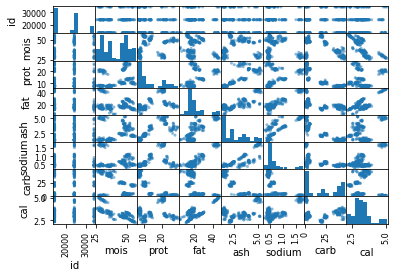

In [100]:
pd.plotting.scatter_matrix(data)

#เนื่องจาก Data  มี dimensions มากเกินไปเราจะทดสอบดูว่า column  ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

ลบแถวที่ไม่ใช่ตัวเลขออก ซึ่งก็คือแถวที่ 1

In [101]:
newdata = data.iloc[:,1:]  #เอาทุกแถวถึงแถวที่1
newdata.head()

,id,mois,prot,fat,ash,sodium,carb,cal
0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


#ตรวจสอบว่าละหว่าง columns มี correlationกันมากน้อยแค่ไหน ด้วย numpy

In [102]:
import numpy as np #numpy ใช้กับข้อมูลที่เป็นตัวเลข


In [103]:
corr = np.corrcoef(newdata.to_numpy().T)

In [104]:
corr.shape #ดูขนาดของ correlation

(8, 8)

In [106]:
corr

array([[ 1.        ,  0.03259505, -0.07648546, -0.00486006, -0.03407156,
        -0.01515608,  0.01496614, -0.02120862],
       [ 0.03259505,  1.        ,  0.36024768, -0.17131821,  0.26555552,
        -0.1022789 , -0.59180165, -0.76444054],
       [-0.07648546,  0.36024768,  1.        ,  0.49800167,  0.8238437 ,
         0.42912952, -0.85354226,  0.0702581 ],
       [-0.00486006, -0.17131821,  0.49800167,  1.        ,  0.79163396,
         0.93332522, -0.64023817,  0.7645671 ],
       [-0.03407156,  0.26555552,  0.8238437 ,  0.79163396,  1.        ,
         0.80812215, -0.89898837,  0.32646845],
       [-0.01515608, -0.1022789 ,  0.42912952,  0.93332522,  0.80812215,
         1.        , -0.62017634,  0.6719575 ],
       [ 0.01496614, -0.59180165, -0.85354226, -0.64023817, -0.89898837,
        -0.62017634,  1.        , -0.02348458],
       [-0.02120862, -0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,
         0.6719575 , -0.02348458,  1.        ]])

In [105]:
for i in range(corr.shape[0] ): #วน loop เพื่อดูว่ามีค่า correlation ใด มีค่าเท่ากับ 1 โดยไม่เอาค่าจากเส้นทแยงมุม
  for j in  range(corr.shape[1] ):
    if( i !=j) and (corr [i,j] == 1.):
      print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

จากการ วน loop ไม่มีค่า correlation เท่ากับ 1 เลย แสดงว่าไม่มีแถวใดที่ซ้ำกัน

plot กราฟ parallel coordinate

In [107]:
from matplotlib import pyplot as plt

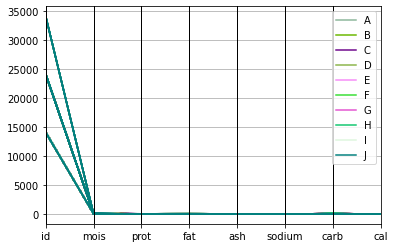

In [108]:
pd.plotting.parallel_coordinates(data,'brand')

ลบคอลัมน์   id ออก เพราะไม่ใช่ตัวเลข แต่เป็นอักขระ string

In [109]:
data_exam1 = data.drop(['id'],axis=1) 
data_exam1

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


ลบคอลัมน์ brand ออก เพราะไม่ใช่ตัวเลข แต่เป็นอักขระ string

In [110]:
data_exam2 = data.drop(['brand','id'],axis=1)   
data_exam2

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


#ทดลอง plot กราฟ parallel coordinate

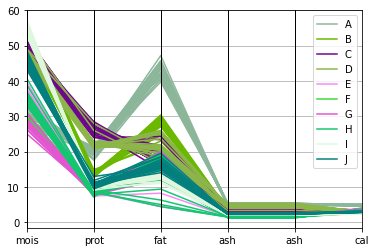

In [111]:
pd.plotting.parallel_coordinates(data_exam1,'brand',cols=['mois','prot','fat','ash','ash','cal'])

จากการ plot pararallel พบว่า dimensions มีจำนวนมากเกินไป ทำให้การ plot ไม่ช่วยให้เข้าใจอะไร  จึงต้องทำ PCA เพื่อลดจำนวน dimensions ของข้อมูล

#ทำ PCA เพื่อลดจำนวน dimensions ของข้อมูล


In [112]:
from sklearn.decomposition import PCA

In [113]:
pca = PCA(n_components=2)  #plot แค่ 2 dimensions แรก

In [114]:
new_pca = pca.fit_transform(data_exam2.to_numpy()) #record แนวนอน (แถว) dimension หลักแนวตั้ง

In [115]:
new_pca.shape #ดูขนาดของ  new PCA   มี300 data  มี 2 dimensions

(300, 2)

In [116]:
new_pca #แต่ละ data จะมี 2 dimensions

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

#ดูว่า brand มีอะไรบ้าง

In [118]:
set(data['brand'])


{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

In [119]:
B = set(data['brand'])
B

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

#สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

In [120]:
 #color_list = {}
 #num = 0
#for each_b in B:
   #if each_b not in color_list:
    #color_list[each_b] = num
    #num += 1

In [26]:
#color_list

#สร้าง color list แบบข้างล่างนี้ ลำดับจะไม่มีการเปลี่ยนแปลง

In [121]:
B_l = list(B)  ### แปลงเป็น list
B_l.sort() ### เรียงค่่า สมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
for each_b in B_l:
    if each_b not in color_list2:
        color_list2[each_b] = num
        num += 1

In [122]:
color_list2

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

#แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด

In [123]:
data_exam3 = data_exam1.replace(color_list2)

In [95]:
data_exam3

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


#Plot กราฟ Scatter

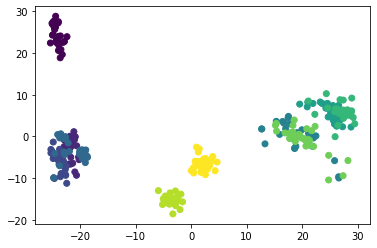

In [126]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_exam3['brand']) #plot graph scatter แล้วข้อมูลทับกัน

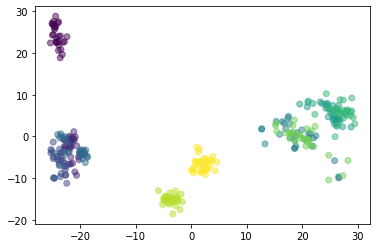

In [128]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_exam3['brand'],alpha=0.5)  #ตัวแปร alpha จะทำให้กราฟที่เคยทับกัน สีทึบ มีความโปร่งใสมากขึ้น ทำให้ชัดเจนขึ้นแต่ก็ยังดูไม่ออกอยู่ดีเพราะข้อมูลเยอะ

#ทดลองเปรียบเทียบ fat กับ carb

In [129]:
fc = data_exam3[(data_exam3['brand']==1) | (data_exam3['brand']==9)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
fc  #ได้มาเฉพาะข้อมูลที่เป็น fat กับ carb

,brand,mois,prot,fat,ash,sodium,carb,cal
29,1,49.57,13.70,29.07,3.62,1.10,4.04,3.33
30,1,52.68,14.38,25.72,3.26,0.93,3.96,3.05
31,1,48.53,13.14,30.38,3.55,0.99,4.40,3.44
32,1,50.19,13.78,28.39,3.56,1.00,4.08,3.27
33,1,50.67,13.21,27.66,3.64,1.00,4.82,3.21
...,...,...,...,...,...,...,...,...
295,9,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,47.60,10.43,15.18,2.32,0.56,24.47,2.76


# plot เพื่อดูการกระจายของข้อมูลว่า fat กับ carb แตกต่างกันมั้ย

In [131]:
pca = PCA(n_components=2) #plot 2 dimensions
new_pca2 = pca.fit_transform(fc.iloc[:,1:].to_numpy())

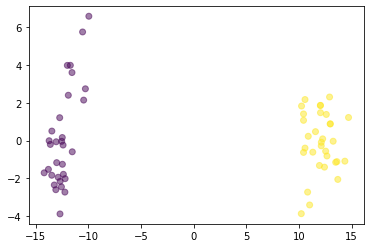

In [132]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = fc['brand'],alpha=0.5) #จากกราฟนี้แสดงให้เห็นว่า fat กับ carb มีการกระจายที่แตกต่างกัน แต่กราฟนี้ทำให้ดูยากเพราะไม่มีชื่อกราฟและแกน

 จากกราฟข้างบนคิดว่า สีม่วงน่าจะเป็น carb เพราะมีคุณค่าสารอาหารมากกว่า สีเหลือง fat

In [36]:
fat_pca = pca.transform(fc[fc['brand']==1].iloc[:,1:].to_numpy())
carb_pca = pca.transform(fc[fc['brand']==9].iloc[:,1:].to_numpy())

#กราฟข้างล่างนี้เราได้กำหนดรูปร่างเป็น วงกลม oc  กับ ดาว *r  และเพิ่มเติมการใส่ชื่อ กราฟ หรือ label ให้กับกราฟเพื่อ ให้อ่านง่าย

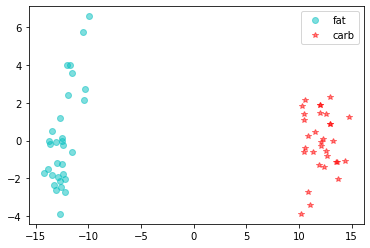

In [37]:
plt.plot(fat_pca[:,0],fat_pca[:,1],'oc',alpha=0.5,label='fat')
plt.plot(carb_pca[:,0],carb_pca[:,1],'*r',alpha=0.5,label='carb')
plt.legend()

#2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

การ plot 2 dimensions นี้ อธิบายข้อมูลได้  ประมาณ98% ซึ่งถือว่า ดี

In [133]:
pca.explained_variance_ratio_ #components ตัวแรกอธิบายข้อมูลได้ 96.72 %  ตัวที่ 2 อธิบายได้ 2.93% 

array([0.96722303, 0.02931391])

#การใส่ชื่อกราฟและ แกน

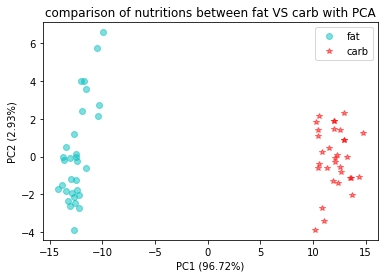

In [134]:
plt.plot(fat_pca[:,0],fat_pca[:,1],'oc',alpha=0.5,label='fat')
plt.plot(carb_pca[:,0],carb_pca[:,1],'*r',alpha=0.5,label='carb')
plt.legend()
plt.title('comparison of nutritions between fat VS carb with PCA')
plt.xlabel('PC1 (96.72%)')
plt.ylabel('PC2 (2.93%)');

ข้อมูลสามารถอธิบายได้ มากกว่า 90% แล้ว ไม่ต้องทำต่อ

#ข้อมูลชุด  nndb_flat

load data

ใช้ pandas

In [136]:
import pandas as pd

In [137]:
data = pd.read_csv('nndb_flat.csv') #ตั้งชื่อตัวแปร
data.head(10) #แสดง 10 ตัวอย่าง

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334.0,20.75,27.68,0.45,0.45,0.0,174.0,0.235,1.65,0.0,0.24,65.0,0.380,0.520,0.070,184.0,0.019,0.50,20.0,0.034,188.0,14.5,2.38,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300.0,19.80,24.26,0.46,0.46,0.0,241.0,0.227,1.30,0.0,0.21,62.0,0.630,0.488,0.028,388.0,0.021,0.33,20.0,0.038,347.0,14.5,2.38,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376.0,25.18,29.20,3.06,0.00,0.0,271.0,0.074,0.27,0.0,0.00,18.0,0.180,0.450,0.031,673.0,0.024,0.64,22.0,0.021,490.0,14.5,2.94,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406.0,24.04,33.82,1.33,0.28,0.0,263.0,0.049,0.88,0.0,0.78,26.0,0.039,0.434,0.027,675.0,0.056,0.16,27.0,0.033,473.0,28.3,3.43,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,1010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387.0,23.37,30.60,4.78,0.00,0.0,233.0,0.074,0.83,0.0,0.00,18.0,0.080,0.293,0.046,643.0,0.042,0.21,21.0,0.012,464.0,14.5,2.79,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


#ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [139]:
data.shape #ดูขนาดของข้อมูล

(8618, 45)

#ลอง plot scatter matrix เพื่อดูการกระจาย ของ data ใน มุมมองต่างๆ

In [43]:
#pd.plotting.scatter_matrix(data)  #dimension เยอะไปทำให้มองไม่ออก

#เนื่องจาก Data มี dimensions มากเกินไปเราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

เลือกมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลขเลยเริ่มจากแถวที่ 7

In [157]:
newdata = data.iloc[:,7:]  #เอาทุกแถวถึงแถวที่7
newdata.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


#ตรวจสอบว่าละหว่าง columns มี correlationกันมากน้อยแค่ไหน ด้วย numpy

In [158]:
import numpy as np #numpy ใช้กับข้อมูลที่เป็นตัวเลข

In [159]:
corr = np.corrcoef(newdata.to_numpy().T)


In [160]:
corr.shape #ดูขนาด correlation

(38, 38)

In [161]:
corr

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

In [164]:
for i in range(corr.shape[0]): #วน loop เพื่อดูว่ามีค่า correlation ใด มีค่าเท่ากับ 1 โดยไม่เอาค่าจากเส้นทแยงมุม
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'column = {i} <=> column = {j} corrcoef = {corr[i,j]}')

column = 10 <=> column = 27 corrcoef = 1.0
column = 12 <=> column = 29 corrcoef = 1.0
column = 13 <=> column = 30 corrcoef = 1.0
column = 14 <=> column = 31 corrcoef = 1.0
column = 18 <=> column = 34 corrcoef = 1.0
column = 20 <=> column = 35 corrcoef = 1.0
column = 22 <=> column = 37 corrcoef = 1.0
column = 27 <=> column = 10 corrcoef = 1.0
column = 29 <=> column = 12 corrcoef = 1.0
column = 30 <=> column = 13 corrcoef = 1.0
column = 31 <=> column = 14 corrcoef = 1.0
column = 34 <=> column = 18 corrcoef = 1.0
column = 35 <=> column = 20 corrcoef = 1.0
column = 37 <=> column = 22 corrcoef = 1.0


จากการวน loop พบว่า มี columns ที่ซ้ำกันจริงๆแค่ columns 10,12,13,14,18,20,22 เท่านั้นที่เหลือแค่สลับตำแหน่งกันเท่านั้น

In [165]:
newdata.iloc[:5,10:30] #โชว์ให้ดูว่า ชื่อ colums มันสัมพันธ์กัน

,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA
0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625
1,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625
2,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188
3,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500
4,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375


In [51]:
from matplotlib import pyplot as plt

#data ที่มี correlation เป็น 1

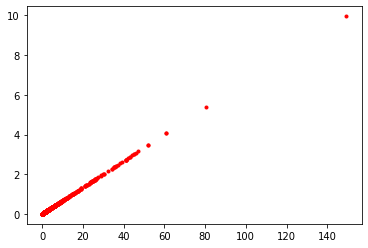

In [52]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,27],'r.')

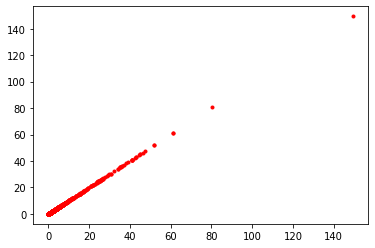

In [53]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,10],'r.')

#data ที่มี correlation เป็นค่าอื่นๆ

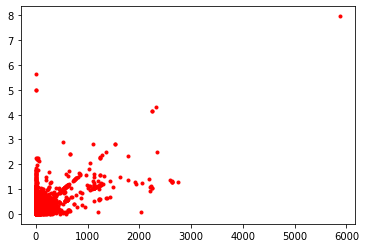

In [54]:
plt.plot(newdata.iloc[:,11],newdata.iloc[:,29],'r.')

#ลบ column ซ้ำ

หลัก ตั้ง คอมลัม นอน ดูว่าซ้ำกันยังไง ดูที่ค่า cor ว่าถ้าเป็น 1 คือซ้ำกัน

In [55]:
newdata.columns.str.contains('_USRDA')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [56]:
newdata.columns[newdata.columns.str.contains('_USRDA')].values

array(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA',
       'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA',
       'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA',
       'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], dtype=object)

In [57]:
newdata.drop(newdata.columns[newdata.columns.str.contains('_USRDA')].values,axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


#ลบ column ที่มีค่า correlation เป็น 1 เมื่อเทียบกับ column อื่น

In [58]:
newdata_dropped = newdata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'],axis=1)
newdata_dropped

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [59]:
data_dropped = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


#ทดลอง plot กราฟ parallel coordinate

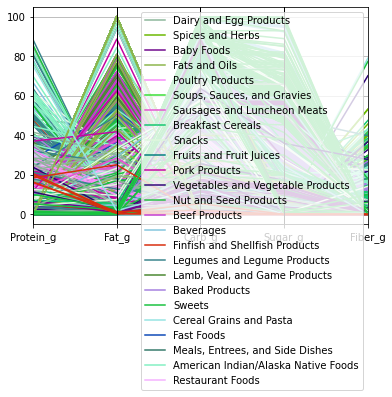

In [60]:
pd.plotting.parallel_coordinates(data_dropped,'FoodGroup',cols=['Protein_g','Fat_g','Carb_g','Sugar_g',	'Fiber_g'])

#ทำ PCA เพื่อลดจำนวน dimensions ของข้อมูล

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=2)


In [63]:
new_pca = pca.fit_transform(newdata_dropped.to_numpy())

In [64]:
new_pca.shape

(8618, 2)

In [65]:
new_pca

array([[ 590.95286674,   85.56968946],
       [ 590.95284476,   85.57159456],
       [ 747.5994042 ,  117.79120834],
       ...,
       [ -95.72739188,  -53.51885094],
       [ -66.70492177, -118.10632681],
       [ -65.40356382,  -28.88067151]])

#ดูว่ามี food group อะไรบ้าง

In [66]:
FG = set(data['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

#สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

สร้าง ​color list แบบง่าย (เมื่อรันใหม่เลขลำดับอาจจะเปลี่ยนแปลง)

In [67]:
# color_list = {}
# num = 0
# for each_fg in FG:
#     if each_fg not in color_list:
#         color_list[each_fg] = num
#         num += 1

In [68]:
# color_list

สร้าง color list แบบข้างล่างนี้ ลำดับจะไม่มีการเปลี่ยนแปลง

In [83]:
FG_l = list(FG)  ### แปลงเป็น list
FG_l.sort() ### เรียงค่า สมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
for each_fg in FG_l:
    if each_fg not in color_list2:
        color_list2[each_fg] = num
        num += 1

In [70]:
color_list2

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

#แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด

In [71]:
data_dropped2 = data_dropped.replace(color_list2)

In [72]:
data_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,10,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,10,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,23,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,10,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


#Plot กราฟ Scatter

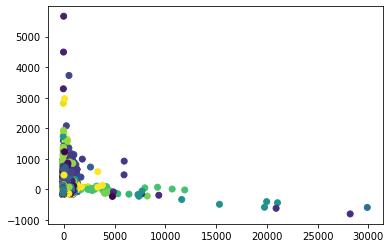

In [85]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'])  #กราฟนี้ข้อมูล มันทับกันเราจะต้องแก้

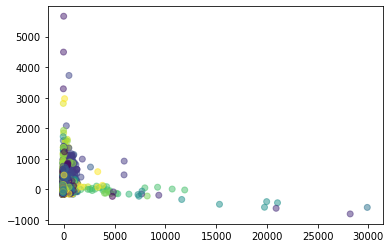

In [74]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'],alpha=0.5)

#ทดลอง เปรียบเทียบค่าสารอาหาร    Fats and Oils และ Restaurant Foods

In [75]:
fr = data_dropped2[(data_dropped2['FoodGroup']==9) | (data_dropped2['FoodGroup']==18)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
fr


,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
610,9,902.0,0.0,100.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000,0.00,0.0,0.2,0.000000,0.000000,0.0000,0.000000,0.180000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003636,0.000000
611,9,902.0,0.0,100.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000,0.00,0.0,0.2,0.000000,0.000000,0.0000,0.000000,0.040000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003636,0.010000
612,9,334.0,0.6,32.9,8.5,4.20,0.1,0.0,0.00,0.00,0.3,0.0,6.0,0.000,0.20,0.0,0.0,0.000000,0.000000,0.0000,0.003333,0.000000,0.000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.082857,0.000000,0.000000
613,9,70.0,0.2,2.7,12.4,6.80,2.0,0.0,0.00,0.00,0.0,0.0,6.0,0.000,0.10,0.0,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.038571,0.000000,0.000000
614,9,84.0,0.2,2.7,15.5,10.30,1.9,0.0,0.00,0.00,0.0,0.0,6.0,0.000,0.12,0.0,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.007143,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8534,9,263.0,0.9,19.0,23.9,4.34,0.0,21.0,0.02,0.21,0.0,6.0,14.0,0.001,0.26,0.0,1.6,0.023333,0.011765,0.0875,0.000000,0.204667,0.015,0.000000,0.015385,0.008333,0.011667,0.000001,0.004762,0.042857,0.029091,0.016364
8535,9,326.0,1.8,35.0,2.0,2.00,0.2,11.0,0.08,0.09,8.8,0.0,4.0,0.030,0.27,0.0,1.6,0.012222,0.047059,0.0375,0.097778,0.266667,0.000,0.043750,0.015385,0.033333,0.003333,0.000033,0.014286,0.035714,0.029091,0.018182
8541,9,231.0,0.3,19.2,16.0,4.20,0.0,0.0,0.00,0.06,0.0,0.0,0.0,0.000,0.00,0.0,1.6,0.000000,0.000000,0.0250,0.000000,0.428667,0.000,0.000000,0.007692,0.000000,0.000000,0.000000,0.000000,0.000000,0.029091,0.010000
8598,9,688.0,0.0,77.8,0.3,0.30,0.0,0.0,0.01,0.00,0.0,0.0,7.0,0.000,0.23,0.0,1.6,0.000000,0.005882,0.0000,0.000000,0.786000,0.000,0.000625,0.046154,0.008333,0.005833,0.000000,0.002381,0.035714,0.029091,0.011818


In [76]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(fr.iloc[:,1:].to_numpy())

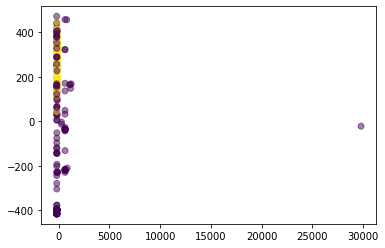

In [77]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = fr['FoodGroup'],alpha=0.5)

In [78]:
Fats_pca = pca.transform(fr[fr['FoodGroup']==9].iloc[:,1:].to_numpy())
Restaurant_pca= pca.transform(fr[fr['FoodGroup']==18].iloc[:,1:].to_numpy())

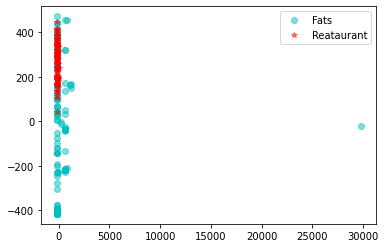

In [79]:
plt.plot(Fats_pca[:,0],Fats_pca[:,1],'oc',alpha=0.5,label='Fats')
plt.plot(Restaurant_pca[:,0],Restaurant_pca[:,1],'*r',alpha=0.5,label='Reataurant')
plt.legend()

#2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [80]:
pca.explained_variance_ratio_

array([0.9645797 , 0.03407991])

#การใส่ชื่อกราฟและ แกน

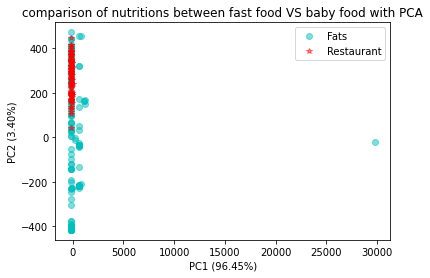

In [82]:
plt.plot(Fats_pca[:,0],Fats_pca[:,1],'oc',alpha=0.5,label='Fats')
plt.plot(Restaurant_pca[:,0],Restaurant_pca[:,1],'*r',alpha=0.5,label='Restaurant')
plt.legend()
plt.title('comparison of nutritions between fast food VS baby food with PCA')
plt.xlabel('PC1 (96.45%)')
plt.ylabel('PC2 (3.40%)');